## Intro to data visualization - task part 2

In [39]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [40]:
#Defining path 
path = r'C:\Users\ale_o\OneDrive\Escritorio\Data Analytics\5. Python\Instacart Basket Analysis 01 - 2023 final'

In [41]:
#Importing data 
df_ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_customers_merge.pkl'))

In [42]:
df_ords_prods_customers.shape

(32404859, 30)

In [43]:
df_ords_prods_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_criteria', 'frequency_order_median', 'frequency',
       'name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'all_name'],
      dtype='object')

In [44]:
df_ords_prods_customers.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,all_name
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
5,3367565,1,6,2,7,19.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
7,3108588,1,8,1,14,14.0,196.0,2.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
8,2295261,1,9,1,16,0.0,196.0,4.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
9,2550362,1,10,4,8,30.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen


### General visualizations

#### 1. Bar chart

([<matplotlib.axis.XTick at 0x224bd5ef9d0>,
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

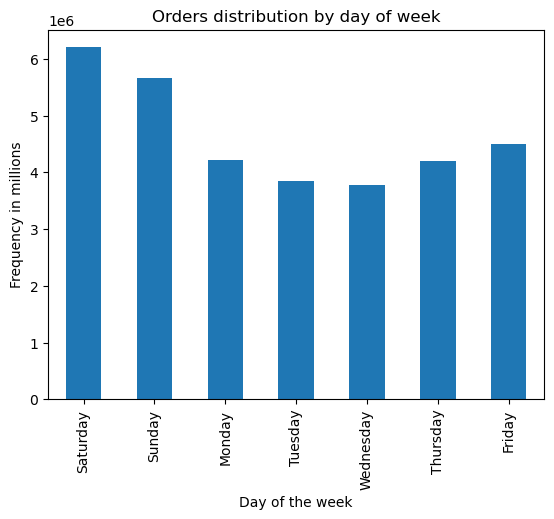

In [45]:
#Creating bar char
df_bar = df_ords_prods_customers['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Orders distribution by day of week')
plt.xlabel('Day of the week')
plt.ylabel('Frequency in millions')
plt.xticks([0,1,2,3,4,5,6],['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])

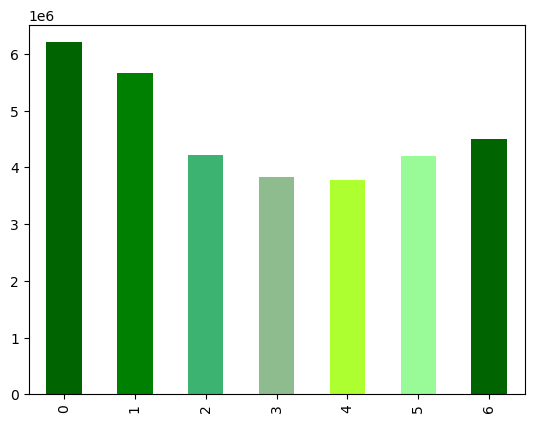

In [46]:
df_bar = df_bar = df_ords_prods_customers['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['darkgreen', 'green','mediumseagreen','darkseagreen','greenyellow','palegreen'])

In [47]:
# Export bar chart 
df_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_orders_dow_task.png'))

#### 2. Histograms

In [48]:
#Checking data 
df_ords_prods_customers['prices'].max()

99999.0

In [49]:
# Turning value 100 into NaNs
df_ords_prods_customers.loc[df_ords_prods_customers['prices'] >100, 'prices'] = np.nan

In [50]:
df_ords_prods_customers['prices'].max()

25.0

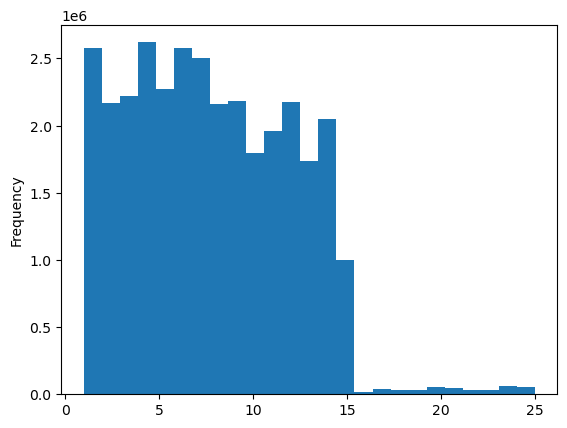

In [51]:
#Creating histogram 
df_hist = df_ords_prods_customers['prices'].plot.hist(bins = 25)

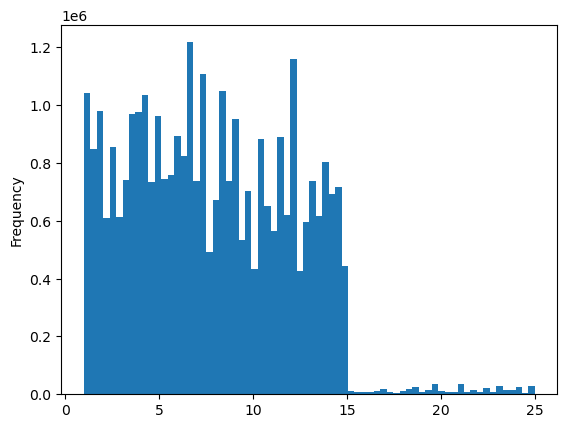

In [52]:
df_hist= df_ords_prods_customers['prices'].plot.hist(bins = 70)
plt.xlabel('Time of the day')
plt.ylabel('Price')
plt.title('Money spent by time of the day')


### 3. Scatterplot

In [14]:
# Defining sample 
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_customers)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [17]:
big =df_ords_prods_customers[dev]

In [18]:
small = df_ords_prods_customers [~dev]

In [19]:
len(dev)

32404859

In [20]:
df_2 = small [['orders_day_of_week', 'prices']]

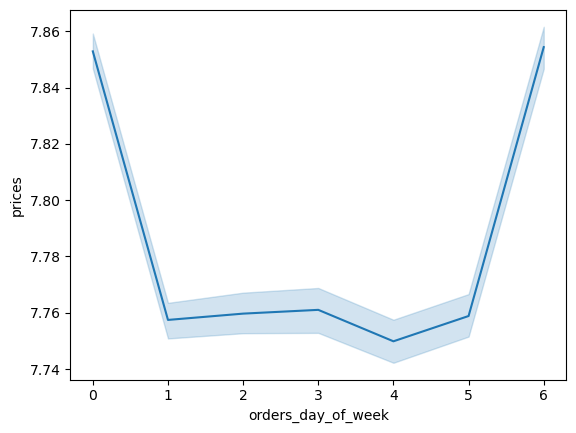

In [46]:
line_orders_day_of_week = sns.lineplot(data= df_2, x ='orders_day_of_week', y ='prices')

### Provide the Instacart senior stakeholders with descriptive findings about sales

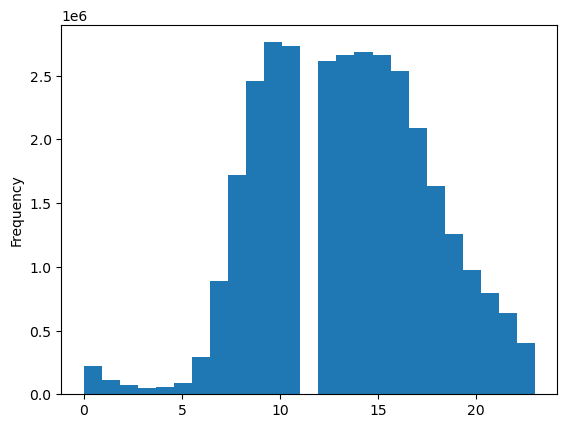

In [23]:
#Creating histogram with 'order_hour_of_day'
hist_order_hour = df_ords_prods_customers['order_hour_of_day'].plot.hist(bins = 25)

In [24]:
df_ords_prods_customers['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

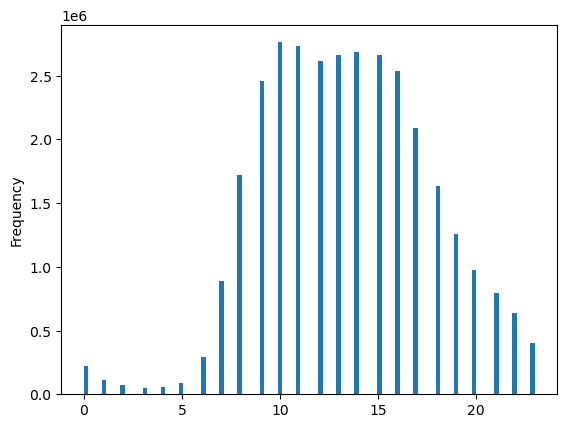

In [30]:
#Creating histogram with 'order_hour_of_day'
hist_order_hour = df_ords_prods_customers['order_hour_of_day'].plot.hist(bins = 100)

The histogram above shows the frequency of orders by hour. 

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [31]:
#Analyzing variable loyalty_flag
df_ords_prods_customers['loyalty_flag'].describe()

count             32404859
unique                   3
top       Regular customer
freq              15876776
Name: loyalty_flag, dtype: object

In [32]:
df_ords_prods_customers['loyalty_flag'].head(10)

0    New customer
1    New customer
2    New customer
3    New customer
4    New customer
5    New customer
6    New customer
7    New customer
8    New customer
9    New customer
Name: loyalty_flag, dtype: object

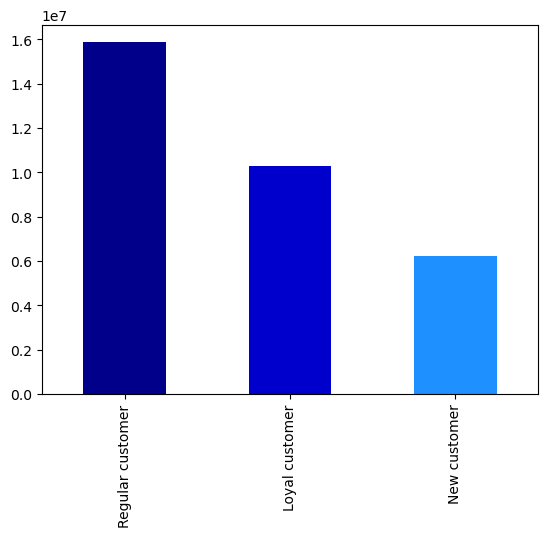

In [38]:
#Creating bar chart for loyalty_flag
bar_loyalty_flag = df_ords_prods_customers['loyalty_flag'].value_counts().plot.bar(color = ['darkblue', 'mediumblue', 'dodgerblue'])

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [45]:
#Creating a line chart using the previous sample 
df_hour_of_the_day = small[[ 'order_hour_of_day','prices']]

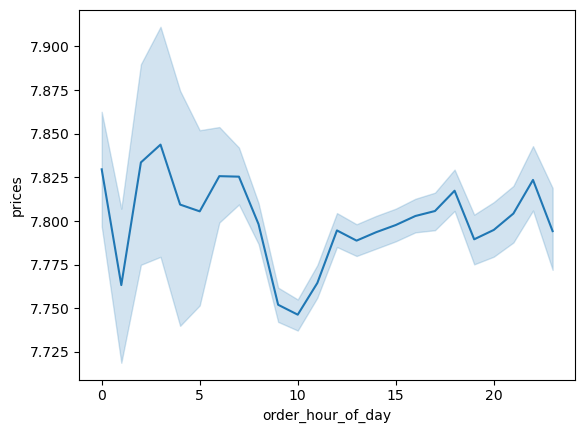

In [47]:
#Creating line chart 
line_order_hour_of_day = sns.lineplot(data = df_hour_of_the_day, x = 'order_hour_of_day', y = 'prices')

### Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [53]:
# Using sample for analysis 
df_age_family = small [['age', 'n_dependants']]

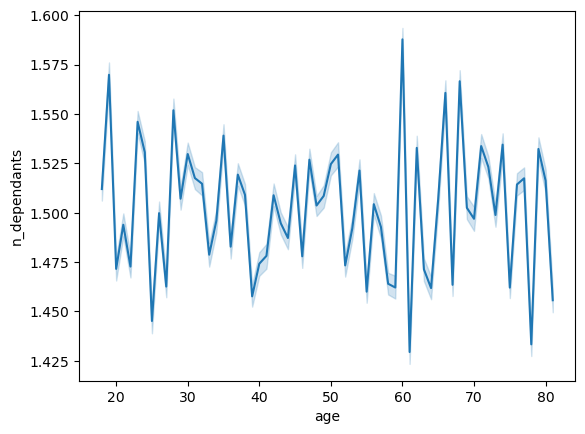

In [55]:
# Creating line chart
line_age_family = sns.lineplot(data = df_age_family, x = 'age', y ='n_dependants')

The line chart above shows the behavior between the age and number of dependants. The graph does not follow a consistent behavior. We cannot tell that the number of dependants is related to the age since the graph has inconsistent up and downs 

### Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function

In [57]:
#Using sample for analysis 'income', 'age'
df_income_age = small[['income','age']]

In [58]:
df_income_age.head(10)

,income,age
0,40423.0,31.0
2,40423.0,31.0
3,40423.0,31.0
6,40423.0,31.0
10,40423.0,31.0
12,40423.0,31.0
13,40423.0,31.0
19,40423.0,31.0
21,40423.0,31.0
22,40423.0,31.0


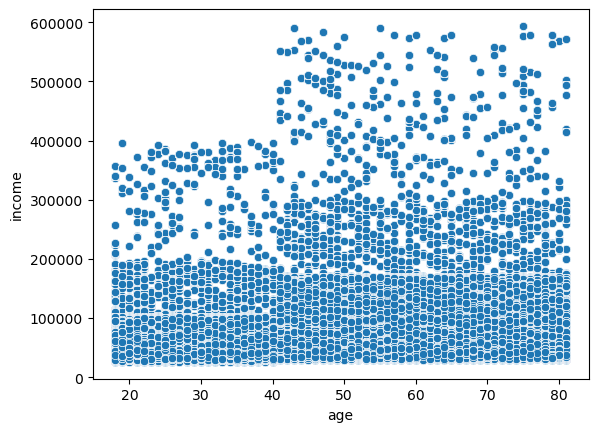

In [60]:
# Creating scatterplot 
scatterplot_income_age = sns.scatterplot(data = df_income_age, x = 'age', y = 'income')

It looks like the higher is the age, the higher is the income, people over 40 can be more potential customers since the income is higher. 

### Exporting files 

In [61]:
df_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_orders_dow_task.png'))

In [63]:
df_hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'histogram_orders_dow.png'))

In [65]:
line_orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dow.png'))

In [66]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [68]:
line_order_hour_of_day .figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_ohd.png'))

In [70]:
line_age_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_family.png'))

In [71]:
scatterplot_income_age.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'scatterplot_income_age.png'))